Keras est une librairie haut-niveau pour faire du deep learning. Elle se branche par dessus des librairies bas-niveau telles que tensorflow, et permet de définir des réseaux au niveau du modèle, et non au niveau des opérations tensorielles.

# Réseau de neurones simple

Un réseau de neurone avec une couche cachée composée de 32 neurones, suivie d'un neurone de classification binaire (sigmoid = 0 ou 1)

**Préparation des données**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataframe = pd.read_csv("sonar.csv", header=None)
dataframe[60] = dataframe[60].map( {'R': 0, 'M': 1} ).astype(int)

data = dataframe.values
X = data[:,0:60].astype(float)
y = data[:,60].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

** Préparation du modèle **

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=60))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Using TensorFlow backend.


Epoch 1/10
145/145 [==============================] - 2s - loss: 0.6722 - acc: 0.5517     
Epoch 2/10
145/145 [==============================] - 0s - loss: 0.6473 - acc: 0.7241     
Epoch 3/10
145/145 [==============================] - 0s - loss: 0.6325 - acc: 0.7310     
Epoch 4/10
145/145 [==============================] - 0s - loss: 0.6266 - acc: 0.7310     
Epoch 5/10
145/145 [==============================] - 0s - loss: 0.6202 - acc: 0.7379     
Epoch 6/10
145/145 [==============================] - 0s - loss: 0.6122 - acc: 0.7517     

** Score de cross-validation **

In [3]:
from sklearn.metrics import accuracy_score

y_predicted = model.predict_classes(X_test)
accuracy_score(y_test, y_predicted)

32/63 [==============>...............] - ETA: 0s

0.80952380952380953

# Réseaux pretrained pour l'image

In [5]:
from keras.applications import ResNet50
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import cv2
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

On charge les poids du réseau pré-entrainé sur imagenet (**Attention, lance le téléchargement des poids ~100M**)

In [ ]:
model = ResNet50(weights='imagenet')

In [7]:
img = cv2.imread('cats_dogs/cat.1.jpg')

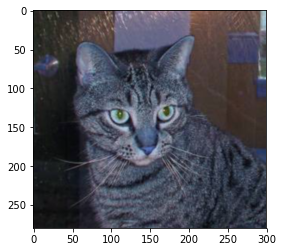

In [8]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [ ]:
img = cv2.resize(cv2.imread('cats_dogs/cat.1.jpg'), (224, 224)).astype(np.float32)
image = img_to_array(img)
image = np.expand_dims(image, axis=0)

In [ ]:
preprocess = imagenet_utils.preprocess_input
image = preprocess(image)

In [ ]:
image.shape

In [ ]:
output = model.predict(image)

P = imagenet_utils.decode_predictions(output)

In [ ]:
P

```
[[('n02123045', 'tabby', 0.47232583),
  ('n02123159', 'tiger_cat', 0.27598724),
  ('n02124075', 'Egyptian_cat', 0.19380775),
  ('n02127052', 'lynx', 0.0098511679),
  ('n02971356', 'carton', 0.005440223)]]
```

<img src='img/tabby.png' width="500">